In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [3]:
y, sr = librosa.load(librosa.ex('trumpet'))
f0, voicing, voicing_p = librosa.pyin(y=y, sr=sr, fmin=200, fmax=700)
S = np.abs(librosa.stft(y))
freqs = librosa.fft_frequencies(sr=sr)
harmonics = np.arange(1, 13)
f0_harm = librosa.harmonic.f0_harmonics(S, freqs=freqs, f0=f0, harmonics=harmonics)

AttributeError: module 'librosa' has no attribute 'f0_harmonics'

In [ ]:
fig, ax =plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0])
times = librosa.times_like(f0)
for h in harmonics:
    ax[0].plot(times, h * f0, label=f"{h}*f0")
ax[0].legend(ncols=4, loc='lower right')
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(f0_harm, ref=np.max),
                         x_axis='time', ax=ax[1])
ax[1].set_yticks(harmonics-1)
ax[1].set_yticklabels(harmonics)
ax[1].set(ylabel='Harmonics')

In [4]:
y, sr = librosa.load(librosa.ex('trumpet'), duration=3)

In [5]:
harmonics = [1./3, 1./2, 1, 2, 3, 4]

In [6]:
S = np.abs(librosa.stft(y))
librosa.display.specshow(librosa.amplitude_to_db(S),
                             sr=sr, y_axis='log', x_axis='time')

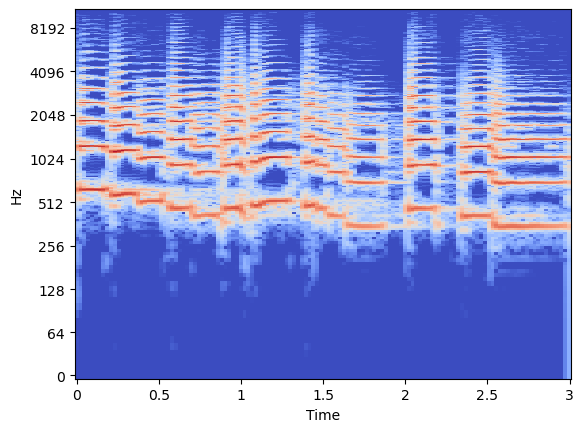

In [10]:
librosa.display.specshow(librosa.amplitude_to_db(S),
                             sr=sr, y_axis='log', x_axis='time')

In [7]:
fft_freqs = librosa.fft_frequencies(sr=sr)

In [8]:
S_harm = librosa.interp_harmonics(S, freqs=fft_freqs, harmonics=harmonics, axis=0)


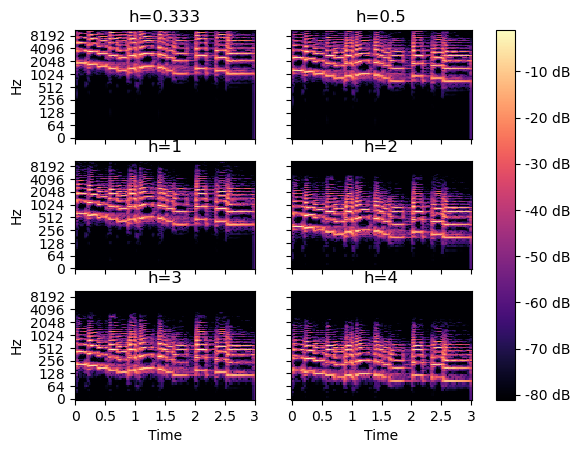

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True)
for i, _sh in enumerate(S_harm):
    img = librosa.display.specshow(librosa.amplitude_to_db(_sh,
                                                     ref=S.max()),
                             sr=sr, y_axis='log', x_axis='time',
                             ax=ax.flat[i])
    ax.flat[i].set(title='h={:.3g}'.format(harmonics[i]))
    ax.flat[i].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [3]:
y, sr = librosa.load(librosa.ex('choice'))

In [4]:
y_harmonic = librosa.effects.harmonic(y, margin=3.0)

In [5]:
y_harmonic.shape

(551823,)

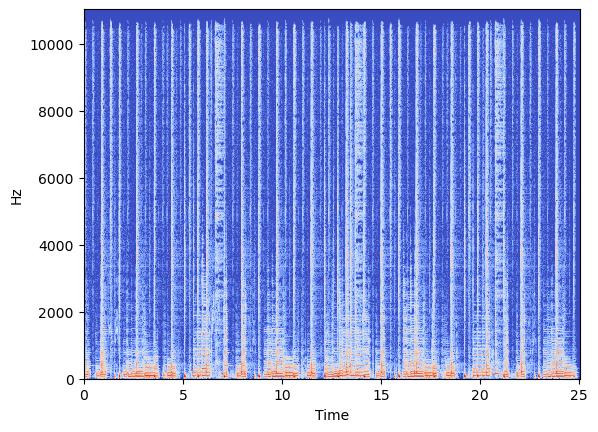

In [7]:
S = np.abs(librosa.stft(y))
librosa.display.specshow(librosa.amplitude_to_db(S),
                             sr=sr, y_axis='linear', x_axis='time')